# <center>Text Message Classifier using Naive Bayes</center>

### **Goal:** Given a bunch of text messages categorised as spam or ham. To develop a classification model that can effectively classify the new unseen text as 'spam' or 'ham'.

**Importing necessary libraries**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the data**

In [4]:
df = pd.read_csv("sms.csv")

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#renaming columns
df.rename(columns = {'v1':'class', 'v2':'text'}, inplace = True)

In [7]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
len(df)

5572

In [9]:
#encoding the class column
df.replace({'class':{"ham":0,"spam":1}}, inplace=True)

In [10]:
df.head(3)

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


**Calculating the Spam Rate**

In [11]:
ham_spam=df["class"].value_counts()
print("spam rate is about {0}%".format(
    round((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100), 2))

spam rate is about 13%


**Model Building**

In [12]:
from sklearn.model_selection import train_test_split

X= df["text"]
y= df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
X_train.head()

4028             [‰Û_] anyway, many good evenings to u! s
1310    I.ll always be there, even if its just in spir...
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814    Not yet chikku..k, then wat abt tht guy did he...
Name: text, dtype: object

In [14]:
y_train.head()

4028    0
1310    0
5469    0
5375    0
3814    0
Name: class, dtype: int64

In [15]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english')

In [16]:
# transforming the train and test datasets
X_train_transformed = vect.fit_transform(X_train)
X_test_transformed = vect.transform(X_test)

In [17]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_transformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_transformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.9736842105263158

In [18]:
bnb

BernoulliNB()

In [19]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1463,    1],
       [  43,  165]], dtype=int64)

In [20]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1463    1]
 [  43  165]]


In [21]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.7932692307692307


In [22]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.9993169398907104


In [23]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9939759036144579
0.9939759036144579


In [24]:
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

PRECISION SCORE : 0.9939759036144579
RECALL SCORE : 0.7932692307692307
F1 SCORE : 0.8823529411764706


In [25]:
#preparinf the ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [26]:
print (roc_auc)

0.9911120087221523


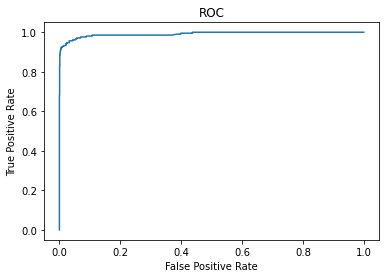

In [27]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

**With a recall of 79%, our model can accurately predict 79% of the true Spams.**
**The precision is 99% suggesting that 99% of spams predicted by our model are actually spams.**

### Thanks

---